In [107]:
import pandas as pd ; import numpy as np ; import matplotlib.pyplot as plt; import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [108]:
df=pd.read_csv('Titanic_dataset.csv')

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

"Embarked" sütunundaki boş değerleri mod ile dolduruyorum.

In [112]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

"Age" sütunundaki eksik değerleri k-En Yakın Komşular kullanılarak dolduruyorum.

In [113]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df["Age"]=imputer.fit_transform(df[["Age"]])

"Cabin" sütununu direkt  siliyorum şuan veride işime yaramıyor.

In [114]:
df.drop(['Cabin'], axis=1, inplace=True)

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Kazada ölenlerin yaş ortalamasını bulunuz

In [116]:
df.groupby("Survived")["Age"].mean().iloc[0]

30.415099646415943

Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [117]:
df.groupby("Survived")["Fare"].mean().iloc[0]

22.117886885245902

In [118]:
df.groupby("Survived")["Fare"].median().iloc[0]

10.5

Kazada ölen erkeklerin yaş ortalamasını bulunuz

In [119]:
df.groupby(["Survived","Sex"])["Age"].mean().iloc[1]

31.17522373051785

Kazada ölen Kadınların yaş ortalamasını bulunuz

In [120]:
df.groupby(["Survived","Sex"])["Age"].mean().iloc[0]

26.02327160493827

Kazadan kurtulanların yaş ortalamasını bulunuz

In [121]:
df.groupby("Survived")["Age"].mean().iloc[1]

28.549778121775027

Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz


In [122]:
df.groupby("Survived")["Fare"].mean().iloc[1]

48.39540760233918

Kazadan kurtulan toplam kişi sayısını bulunuz… 

In [123]:
df.Survived[df.Survived==1].value_counts()

Survived
1    342
Name: count, dtype: int64


10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [124]:
df.Fare[df.Age<10].median()

27.0

1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırınız. (Pclass değişkeni sınıfları barındırmaktadır.)


In [125]:
df.groupby("Pclass")["Fare"].agg(mean='mean', median='median')

,mean,median
Pclass,,
1,84.154687,60.2875
2,20.662183,14.2500
3,13.675550,8.0500


Text(0.5, 1.0, '1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırması')

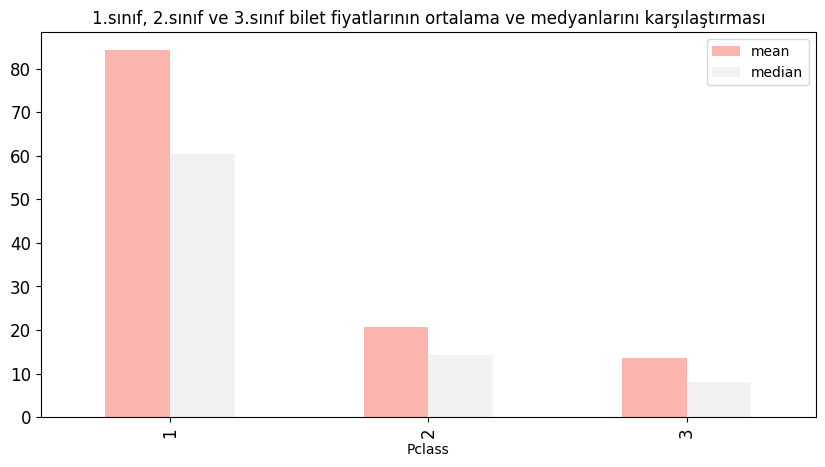

In [126]:
df.groupby("Pclass")["Fare"].agg(mean='mean', median='median').plot(kind='bar',colormap='Pastel1', figsize=(10,5), fontsize=12)
plt.title("1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırması")

Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. (Örnek: erkekler için; ölen erkeklerin, erkek sayısına bölümü bu oranı vermektedir.


In [127]:
man=len(df[df.Sex=="male"])
women=len(df[df.Sex=="female"])
dead_man=len(df[(df.Sex=="male")&(df.Survived==0)])
dead_women=len(df[(df.Sex=="female")&(df.Survived==0)])
manrate=dead_ma/man
womenrate=dead_women/women
values=[manrate,womenrate]
labels=["Erkek","Kadın"]


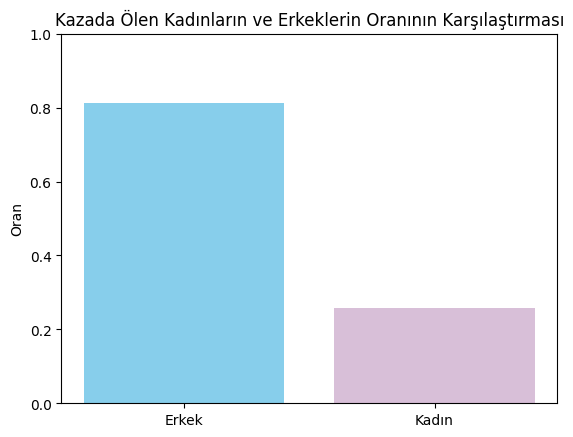

In [128]:
plt.bar(labels, values, color=['skyblue', 'thistle'])

plt.title('Kazada Ölen Kadınların ve Erkeklerin Oranının Karşılaştırması')
plt.ylabel('Oran')
plt.ylim(0, 1) 
plt.show()